Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0

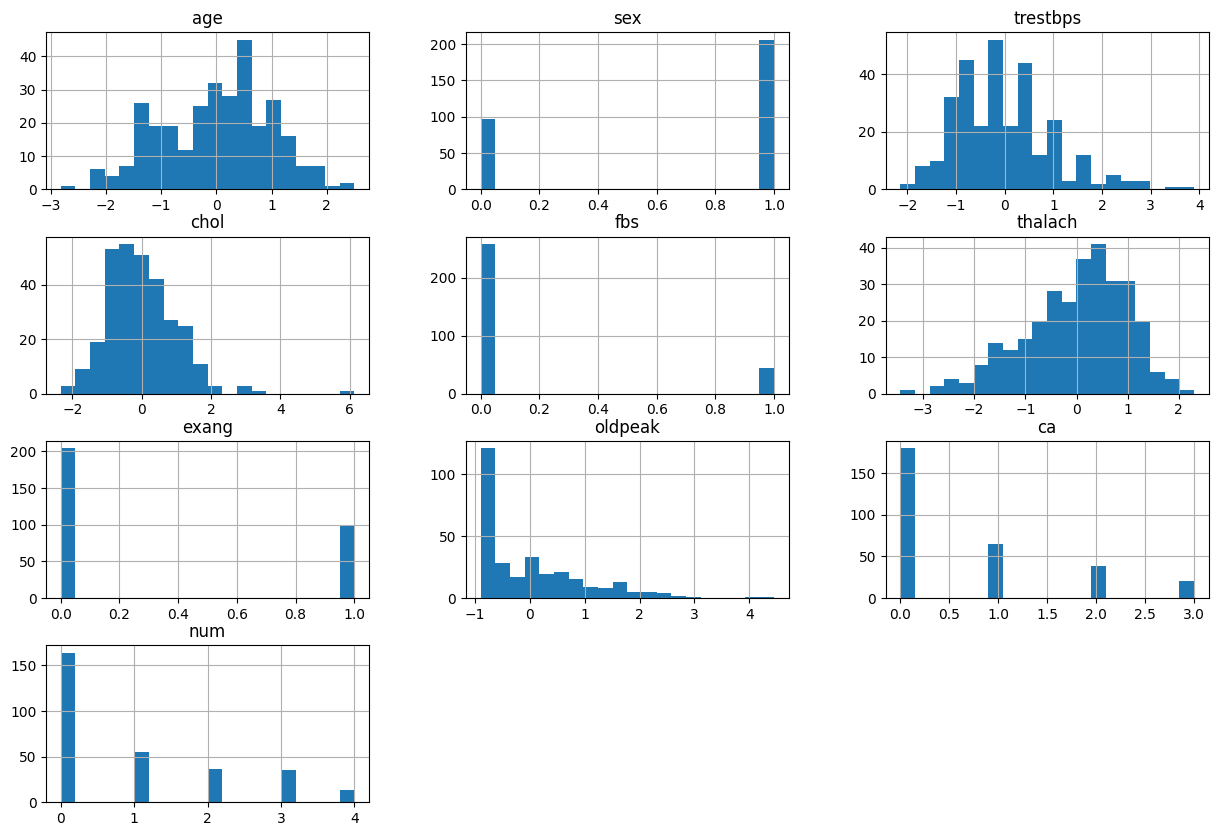

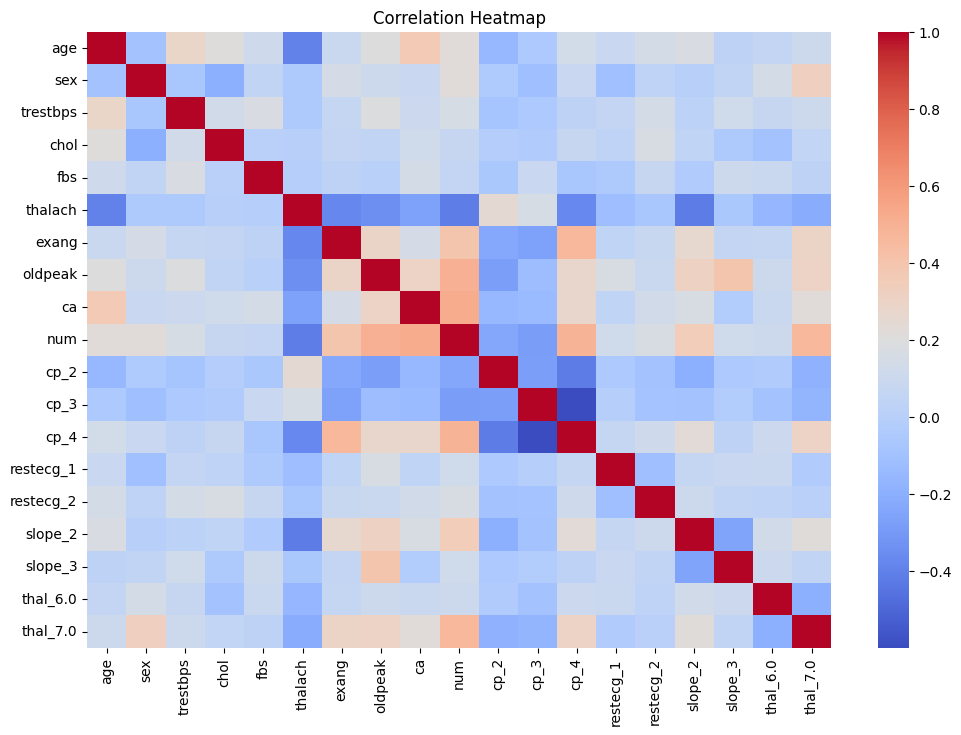

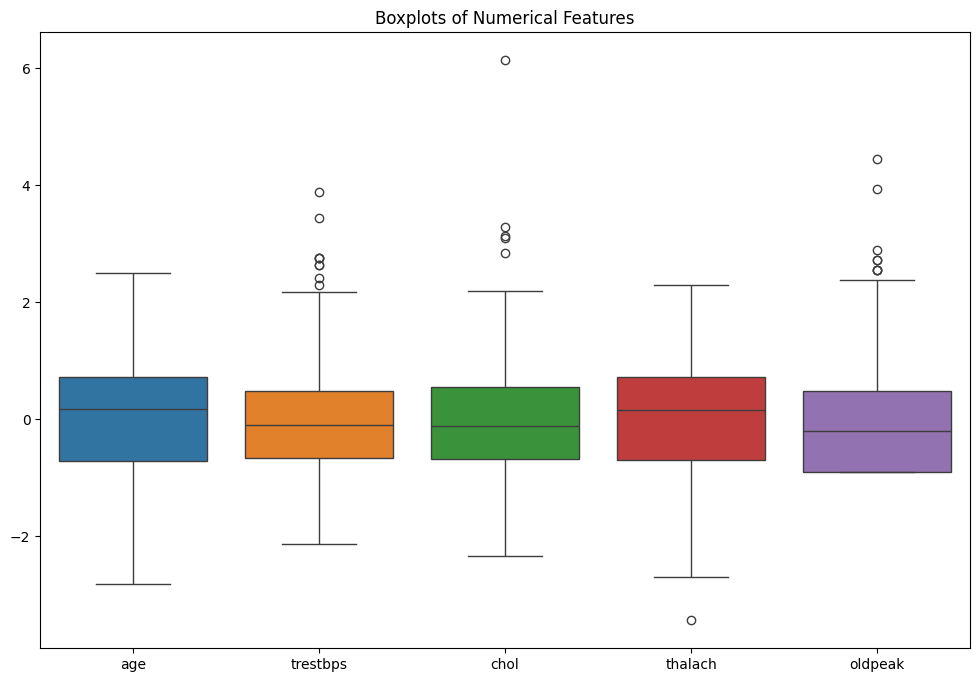

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv("../data/heart_disease.csv")   # adjust path if needed
print("Dataset shape:", df.shape)
print(df.head())

# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Handle missing values
# Strategy: replace missing with most frequent value (mode)
imputer = SimpleImputer(strategy="most_frequent")
df[["ca","thal"]] = imputer.fit_transform(df[["ca","thal"]])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# 4. Encode categorical variables (one-hot encoding)
categorical_cols = ["cp", "restecg", "slope", "thal"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataset after encoding shape:", df.shape)

# 5. Standardize numerical features
scaler = StandardScaler()
num_cols = ["age","trestbps","chol","thalach","oldpeak"]

df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nSample after scaling:")
print(df.head())

# 6. EDA
# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numerical Features")
plt.show()

# 7. Save cleaned dataset
df.to_csv("../data/cleaned_heart.csv", index=False)
